In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

<ipython-input-2-04d092282745>:1: RuntimeWarning: covariance is not positive-semidefinite.
  x1, y1 = np.random.multivariate_normal([5,2], [[1, 1], [5, 2]], 50).T


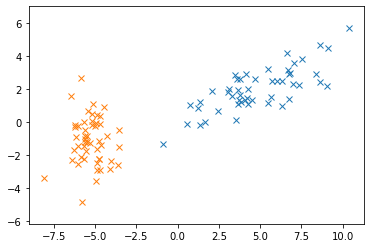

In [2]:
x1, y1 = np.random.multivariate_normal([5,2], [[1, 1], [5, 2]], 50).T
x2, y2 = np.random.multivariate_normal([-5,-1], [[1, 0], [0, 2]], 50).T
plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

In [3]:
def labelCreator(x,y,label):
    xList = []
    for i in range(x.shape[0]):
        xList.append([x[i], y[i], label])
    return xList

In [4]:
x1Labeled = labelCreator(x1,y1,-1)
x2Labeled = labelCreator(x2,y2,1)
combinedX = x1Labeled + x2Labeled
random.shuffle(combinedX)

In [5]:
X = np.delete(combinedX, np.s_[-1:], axis=1)
y = np.delete(combinedX, np.s_[:2], axis=1)

In [6]:
print(X[:5])
x = np.insert(X,0,[1,1])
x

[[-6.4943822   1.60850938]
 [-6.27076431 -1.64974986]
 [-4.96698082 -0.05212647]
 [-5.59177264 -0.82621316]
 [ 3.2896446   1.58292559]]


array([ 1.00000000e+00,  1.00000000e+00, -6.49438220e+00,  1.60850938e+00,
       -6.27076431e+00, -1.64974986e+00, -4.96698082e+00, -5.21264746e-02,
       -5.59177264e+00, -8.26213161e-01,  3.28964460e+00,  1.58292559e+00,
       -4.91207235e+00, -2.86538200e+00, -4.73552295e+00, -2.87237989e+00,
       -5.29808840e+00, -1.27241356e+00, -6.05955798e+00, -2.27694867e-01,
       -6.23536415e+00, -1.32934584e-01, -6.42709069e+00, -2.25470271e+00,
        3.52172311e+00,  1.35391588e-01,  1.34893149e+00,  1.22823514e+00,
       -5.18980114e+00, -1.45096386e-01,  1.62726999e+00, -3.01469346e-03,
       -4.66013578e+00, -1.38287697e+00,  3.48855799e+00,  2.88043858e+00,
        6.34972877e+00,  2.49433227e+00,  5.70061108e+00,  2.53230651e+00,
       -4.93485323e+00, -3.57124998e+00,  6.30829788e+00,  1.00665647e+00,
        3.78992842e+00,  1.67954415e+00,  6.80774463e+00,  3.00973223e+00,
        3.57223285e+00,  2.66008769e+00, -5.13864738e+00,  1.09218232e+00,
        5.50556720e-01, -

In [18]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=10):
        self.W = np.zeros(input_size+1)
        self.lr = lr
        self.epochs = epochs
        self.YHat = []
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def fit(self, X, y):
        x = np.insert(X,0,1)
        for _ in range(self.epochs):
            for i in range(y.shape[0]):
                x = np.insert(X[i], 0, 1)
                yHat = self.predict(x)
                self.YHat.append(yHat)
                e = y[i] - yHat
                self.W = self.W + self.lr * e * x

In [21]:
test = Perceptron(2)
test.fit(X,y)
print(test.W)
print(test.YHat)
print(y)

[ -511.         -2401.08833055 -1011.63108082]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0

array([ -511.        , -2401.08833055, -1011.63108082])

In [28]:
fig = plt.figure([figsize])
fig.add_subplot(RCI, [projection])
ax = fig.add_subplot(111, projection="3d")

NameError: name 'figsize' is not defined

In [23]:
xx, yy = np.meshgrid(X[0],X[1]), y

In [24]:
ax.plot_surface(xx, yy, y)

NameError: name 'ax' is not defined